In [103]:
import pandas as pd
import numpy as np

In [104]:
df = pd.read_csv("/Users/rohithr/Desktop/salary_prediction/Salary_Data.csv")

In [105]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [106]:
x = df.drop('Salary',axis =1)
y = df['Salary']

In [107]:
print(x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [108]:
print(y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [110]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4,random_state=43)


In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [112]:
import pickle
scaling = pickle.dump(scaler,open("scaling.pkl",'wb'))


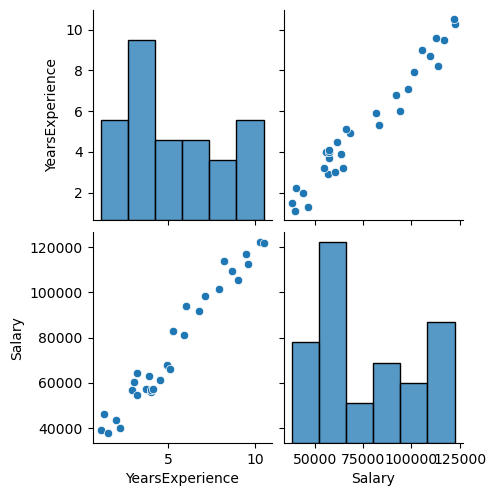

In [113]:
import seaborn as sns
sns.pairplot(df)

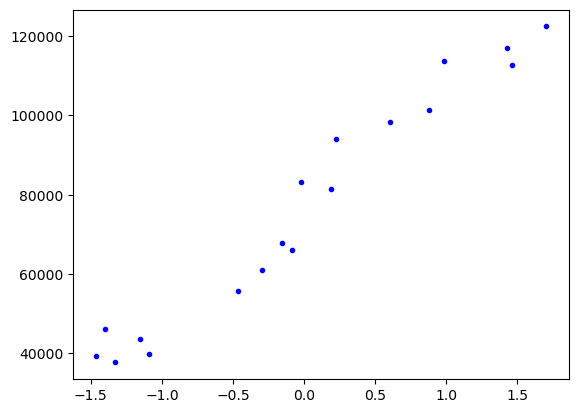

In [114]:
import matplotlib.pyplot as plt
plt.plot(xtrain,ytrain,'b.')
plt.show()


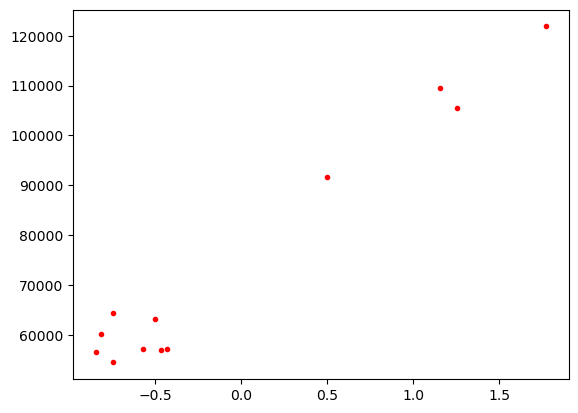

In [115]:
plt.plot(xtest,ytest,'r.')
plt.show()

In [116]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [117]:
pred = reg.predict(xtest)
print(pred)

[112192.69845928  63554.84996332  64527.60693324  53827.28026412
  55772.79420396  55772.79420396  62582.0929934   90792.04512106
  60636.57905356 126784.05300807  52854.5232942  109274.42754952]


In [118]:
query = reg.predict(np.array([6]).reshape(1,-1))
print(query)


[246036.84807941]


In [119]:
import numpy as np
calc = pd.DataFrame(np.c_[ytest,pred],columns=(['original','predicted']))
calc

,original,predicted
0,105582.0,112192.698459
1,56957.0,63554.849963
2,57081.0,64527.606933
3,60150.0,53827.280264
4,54445.0,55772.794204
5,64445.0,55772.794204
6,63218.0,62582.092993
7,91738.0,90792.045121
8,57189.0,60636.579054
9,121872.0,126784.053008


In [120]:
print("training accuracy-->",reg.score(xtrain,ytrain))
print("testng accuracy-->",reg.score(xtest,ytest))

training accuracy--> 0.9567362353956277
testng accuracy--> 0.9541638989802343


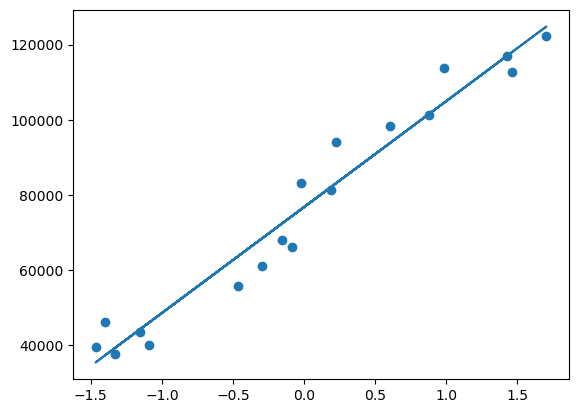

In [121]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.show()

In [122]:
import pickle
reg_model = pickle.dump(reg,open("reg_model.pkl",'wb'))
